<a href="https://colab.research.google.com/github/Kamraaan1/BDA/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  Business Data Analytics - Practice Session_05  </font></center></h1>
<h2><center> <font color='black'> Regression part 02</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>
</div>

# Today's session agenda:
1. **Recap from previous lab session**
2. **Cross-Validation and parameter tunning with Linear Regression and evaluation metrics**
3. **L1, L2, and Isotonic regression**


##1. Recap from previous lab session: What are we actually doing?

Source: https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3

Machine learning tasks can be gathered into the four following categories:

![picture](https://miro.medium.com/max/700/1*vJsXYNlr_GyFc2qrpZGsvA.png)

**1.1 Regression:**

* Simple Linear Regression:

![](https://www.askpython.com/wp-content/uploads/2020/09/image-40.png.webp)

* Multiple Linear Regression:
![](https://www.askpython.com/wp-content/uploads/2020/09/image-39.png.webp)

* Polynomial regression
![picture](https://www.askpython.com/wp-content/uploads/2020/09/image-43.png.webp)


##1.2 Ok, so what are the steps?

<img src="https://i.ibb.co/6Zzq2dC/Regression-steps.png">

**step 1: Import required packages and libs**

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler # preprocessing
from sklearn.preprocessing import PolynomialFeatures # preprocessing
from sklearn.preprocessing import scale # preprocessing
from sklearn.feature_selection import RFE # preprocessing

from sklearn.linear_model import LinearRegression # ML alg

# cross validation 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import warnings # supress warnings
# warnings.filterwarnings('ignore')

**Step 2: load and prepare data**

In [ ]:
# import Housing.csv
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# info about the data
housing.info()

# check missing values
housing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# list of all the "yes-no" binary categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
housing[binary_vars_list] = housing[binary_vars_list].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

# concat the dummy variable df with the main df
housing = pd.concat([housing, status], axis = 1)
housing.head()


# 'furnishingstatus' since we alreday have the dummy vars
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667         1          0   
1  0.909091  0.502405       0.6   1.000000  1.000000         1          0   
2  0.909091  0.571134       0.4   0.333333  0.333333         1          0   
3  0.906061  0.402062       0.6   0.333333  0.333333         1          0   
4  0.836364  0.396564       0.6   0.000000  0.333333         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  0.666667         1   
1         0                0                1  1.000000         0   
2         1                0                0  0.666667         1   
3         1                0                1  1.000000         1   
4         1                0                1  0.666667         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1      

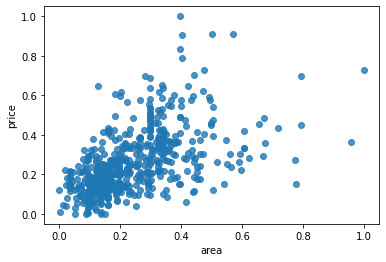

In [ ]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
housing[numeric_vars] = scaler.fit_transform(housing[numeric_vars])
print(housing.head())

# visualise area-price relationship
sns.regplot(x="area", y="price", data=housing, fit_reg=False)


**Step 3: Building a Model Without Cross-Validation**

Let's now build a multiple regression model. First, let's build a vanilla MLR model without any cross-validation etc.

**Train/Test Split**

![](https://miro.medium.com/max/933/1*-8_kogvwmL1H6ooN1A1tsQ.png)


In [ ]:

df = housing


X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'price']
, df['price'],
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)



In [ ]:
lr_model = LinearRegression() # 1st step: create the model
lr_model.fit(X_train, y_train) # 2nd step: fit the model
lr_pred = lr_model.predict(X_test) # 3rd step for test data: make predictiion (test)
lr_pred_tr = lr_model.predict(X_train) # 3rd step for train data: make prediction (train)
 


**Evaluation step**
![picture](https://miro.medium.com/max/602/1*FLgxx9NbqgHT0sqfz-DBaA.png)

In [ ]:

# 4th step
# Evaluate the lr model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Evaluate the lr model
# MAE
test_set_mae = mean_absolute_error(y_test, lr_pred)
#MSE
test_set_mse = (mean_squared_error(y_test, lr_pred))
# RMSE
test_set_rmse = (np.sqrt(mean_squared_error(y_test, lr_pred)))
#R^2
lr_wcv_test_set_r2 = r2_score(y_test, lr_pred)

print("mean absolute error is: ", test_set_mae)
print("mean squared error is: ", test_set_mse)
print("root mean squared error is: ", test_set_rmse)
print("rscore: ", lr_wcv_test_set_r2)

mean absolute error is:  0.06164320905293722
mean squared error is:  0.005666489919406746
root mean squared error is:  0.07527609128672096
rscore:  0.7407371209623979


2. **Cross-Validation and parameter tunning with Linear Regression.**

![](https://miro.medium.com/max/701/1*55TfJMq5AkMKDg9VUa7ktA.jpeg)

* Five reasons why you should use Cross-Validation in your Data Science Projects:
    * By doing cross-validation, we’re able to use all our observations both for training and for testing while evaluating our learning algorithm on examples it has never seen before.
    *  Parameters Fine-Tuning

For more details feel free to visit this [blog post](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)

* The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later. 

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


* **2.1 Let's now experiment with k-fold CV.**


In [ ]:
# the other way of doing the same thing (more explicit)
lm = LinearRegression()
#create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores 

array([0.57093763, 0.520441  , 0.65915394, 0.5779965 , 0.7261659 ])


**2.2 Hyperparameter Tuning Using Grid Search Cross-Validation**

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called `grid search cross-validation`. 

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,  # Feature ranking with recursive feature elimination.
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_

{'n_features_to_select': 11}

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012659,0.000378,0.002241,0.000129,1,{'n_features_to_select': 1},0.165343,0.364510,0.286444,0.363613,...,0.280866,0.077982,13,0.317828,0.273016,0.293253,0.277104,0.307070,0.293654,0.017113
1,0.010891,0.000147,0.002171,0.000044,2,{'n_features_to_select': 2},0.331716,0.249696,0.496295,0.568599,...,0.422501,0.115588,12,0.471942,0.486390,0.428221,0.424546,0.442831,0.450786,0.024398
2,0.011327,0.001787,0.002283,0.000097,3,{'n_features_to_select': 3},0.318101,0.342613,0.506250,0.635715,...,0.467976,0.120475,11,0.504139,0.539203,0.506091,0.483334,0.500285,0.506610,0.018169
3,0.011149,0.001309,0.002385,0.000196,4,{'n_features_to_select': 4},0.404743,0.393566,0.517595,0.605492,...,0.494358,0.082729,10,0.537811,0.556197,0.512843,0.515884,0.526837,0.529914,0.015817
4,0.010282,0.002181,0.002684,0.000498,5,{'n_features_to_select': 5},0.433187,0.420236,0.539642,0.550456,...,0.499762,0.060000,9,0.558294,0.602700,0.548909,0.572759,0.532854,0.563103,0.023667
5,0.008915,0.000337,0.002283,0.000095,6,{'n_features_to_select': 6},0.487687,0.445046,0.534247,0.541267,...,0.526862,0.060551,8,0.597244,0.638304,0.560850,0.585328,0.566251,0.589595,0.027642
6,0.007898,0.000163,0.002189,0.000030,7,{'n_features_to_select': 7},0.517592,0.457683,0.579160,0.612771,...,0.569127,0.076194,7,0.630409,0.641750,0.610214,0.616435,0.593670,0.618496,0.016564
7,0.006811,0.000069,0.002090,0.000044,8,{'n_features_to_select': 8},0.543150,0.489115,0.611248,0.593997,...,0.586809,0.069482,5,0.639625,0.650258,0.624453,0.639896,0.604609,0.631768,0.015880
8,0.006309,0.000195,0.002123,0.000057,9,{'n_features_to_select': 9},0.551317,0.483390,0.622077,0.558179,...,0.582167,0.071840,6,0.656615,0.660098,0.630499,0.657373,0.613538,0.643625,0.018475
9,0.005542,0.000188,0.002203,0.000107,10,{'n_features_to_select': 10},0.566509,0.510615,0.646541,0.564754,...,0.599737,0.070254,4,0.664883,0.672163,0.639705,0.658117,0.628221,0.652618,0.016276


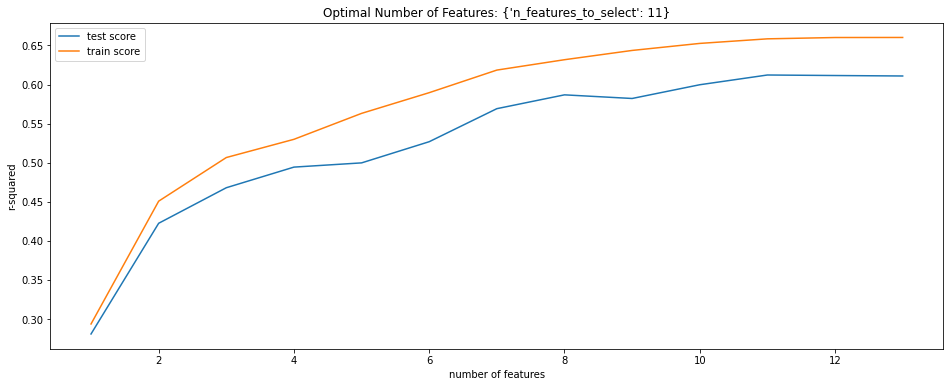

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title(f"Optimal Number of Features: {model_cv.best_params_}")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# final model with cross validation and param tunning
n_features_optimal = 11

lm = LinearRegression() # create the model

rfe = RFE(lm, n_features_to_select=n_features_optimal)  #Feature ranking with recursive feature elimination.  https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html         
rfe = rfe.fit(X_train, y_train) # fit the model

# predict prices of X_test
y_pred = rfe.predict(X_test) # make prediction
r2 = sklearn.metrics.r2_score(y_test, y_pred) # evaluate the model
print("rscore: ",r2)
print("MAE: ",sklearn.metrics.mean_absolute_error(y_test, y_pred) )

rscore:  0.7345901463879154
MAE:  0.06253483614209279


**4. L1, L2, and Isotonic regression**

**4.1 L1 and L2 Regularization**
  * A regression model that uses **L1** regularization technique is called Lasso Regression and model which uses **L2** is called Ridge Regression.
  * The key difference between these two is the penalty term.

    * Ridge: 
    
  ![](https://miro.medium.com/max/324/1*jgWOhDiGjVp-NCSPa5abmg.png)

    * Lasso

  ![](https://miro.medium.com/max/320/1*4MlW1d3xszVAGuXiJ1U6Fg.png)



**Implement the L2 and L1 regularization for Linear regression using the Ridge and Lasso modules of the Sklearn library of Python.**


**Step 1: Importing the required libraries**

In [ ]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 


**Step 2: Loading and cleaning the Data**

In [ ]:
df = housing


X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'price']
, df['price'],
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)





**Step 3: Building and evaluating the different models**

**a) Linear Regression:**

In [ ]:
# Linear Regression
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 
  
# Evaluating the Linear Regression model 
print("rscore: ",linearModel.score(X_test, y_test)) 
print("MAE: ",sklearn.metrics.mean_absolute_error(y_test, linearModel.predict(X_test)) )

rscore:  0.7407371209623979
MAE:  0.06164320905293722


**b) Ridge(L2) Regression:**

In [ ]:

# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Separating the dependent and independent variables 
y = df['price'] 
X = df.drop('price', axis = 1) 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25)  # alpha: Regularization strength; must be a positive float.
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : -4388.572995183651
0.5 : -4375.752774535499
0.75 : -4364.536958664666
1.0 : -4354.7005096362855
1.25 : -4346.053656747701
1.5 : -4338.435690929914
1.75 : -4331.709981576265
2.0 : -4325.759948824493


From the above output, we can conclude that the best value of alpha for the data is 2.

In [ ]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) # 1st step
ridgeModelChosen.fit(X_train, y_train)  # 2nd step
  
# Evaluating the Ridge Regression model 
print("rscore: ",ridgeModelChosen.score(X_test, y_test)) 
print("MAE: ",sklearn.metrics.mean_absolute_error(y_test, ridgeModelChosen.predict(X_test)) )

rscore:  0.7236771764209962
MAE:  0.06290007099248628


**c) Lasso(L1) Regression:**

In [ ]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 0.01,) # 1st step
lassoModelChosen.fit(X_train, y_train) # 2nd step
  
# Evaluating the Lasso Regression model 
print("rscore: ",lassoModelChosen.score(X_test, y_test)) 
print("MAE: ",sklearn.metrics.mean_absolute_error(y_test, lassoModelChosen.predict(X_test)) )

rscore:  0.3937688013441245
MAE:  0.08831902303621335


In [ ]:

# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
         ridgeModelChosen.score(X_test, y_test), 
         lassoModelChosen.score(X_test, y_test)] 

# scores = [sklearn.metrics.mean_absolute_error(y_test, linearModel.predict(X_test)) , 
#          sklearn.metrics.mean_absolute_error(y_test, ridgeModelChosen.predict(X_test)), 
#         sklearn.metrics.mean_absolute_error(y_test, lassoModelChosen.predict(X_test)) ] 
   
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 
# mapping['Linear Regreesion'] = sklearn.metrics.mean_absolute_error(y_test, linearModel.predict(X_test)) 
# mapping['Ridge Regreesion'] = sklearn.metrics.mean_absolute_error(y_test, ridgeModelChosen.predict(X_test)) 
# mapping['Lasso Regression'] = sklearn.metrics.mean_absolute_error(y_test, lassoModelChosen.predict(X_test)) 

# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 


Linear Regreesion : 0.7407371209623979
Ridge Regreesion : 0.7236771764209962
Lasso Regression : 0.3937688013441245


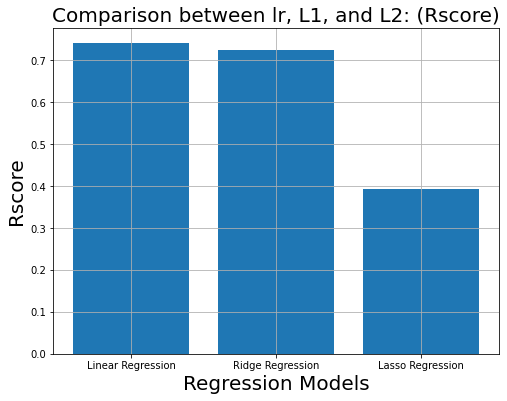

In [ ]:

# set figure properties
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

# histogram bins 
# linspace returns evenly spaced numbers over a specified interval
# bins = np.linspace(0, 40)

# set titles for figure, x, y
plt.title("Comparison between lr, L1, and L2: (Rscore)",fontsize=20)
plt.xlabel('Regression Models', fontsize=20)
plt.ylabel('Rscore',fontsize=20)


# plot histogram using plt.hist()
#plt.hist(df.amount, bins, alpha=0.7, histtype='bar', ec='black')
plt.bar(models, scores) 

#plt.xticks(fontsize = 20) 
#plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

**4.2 Isotonic Regression:**

The term “ Isotonic” originates from the Greek root words “ iso” and “ tonos.” The root “ iso” isn’t just a file format, it actually means equal. “ Tonos,” on the other hand, means to stretch. The word Isotonic can mean a multitude of things stretching from material and physical sciences to liberal arts.

Equal Stretch Regression (Isotonic Regression) is a really cool model for statistical inference. 

![](https://miro.medium.com/max/933/1*lSz9bz1kbBDmnDmKpCJRXw.png)

In [ ]:
from sklearn.isotonic import IsotonicRegression

df = housing

X = df['area']
y = df['price'] 


# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

# Fit IsotonicRegression and LinearRegression models
iso_model = IsotonicRegression() # 1st step: create th model
iso_model.fit(X_train, y_train) # 2nd step: fit the model
iso_pred = iso_model.predict(X_test) # 3rd step for test data: make prediction
iso_pred_tr = iso_model.predict(X_train) # 3rd step for train data

#test_set_r2 = iso_model.score(y_test, iso_pred)
print("rscore: ", r2_score(y_test, iso_pred))
print("MAE: ",sklearn.metrics.mean_absolute_error(y_test, iso_pred) )

rscore:  0.29160649414533346
MAE:  0.10337803240863956


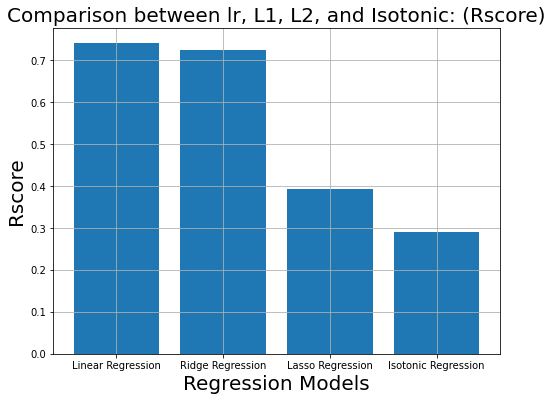

In [ ]:
# Building the two lists for visualization 
models.append("Isotonic Regression")
scores.append(r2_score(y_test, iso_pred))
#scores.append(sklearn.metrics.mean_absolute_error(y_test, iso_pred))

# set figure properties
from matplotlib.pyplot import figure
figure(figsize=(8, 6))


# set titles for figure, x, y
plt.title("Comparison between lr, L1, L2, and Isotonic: (Rscore)",fontsize=20)
plt.xlabel('Regression Models', fontsize=20)
plt.ylabel('Rscore',fontsize=20)


# Bar plot
plt.bar(models, scores) 

plt.grid(True)
plt.show() 